# **MRI Image Selection**

Karena data MRI memiliki banyak slice, memilih beberapa slice tentunya membuat proses komputasi menjadi lebih mudah, maka dari itu saya memilih 3 slice terbesar dari keseluruhan slice.

---

## 1. Import packages

Import modul-modul yang diperlukan untuk pengolahan citra medis, termasuk pembacaan citra dengan `SimpleITK`, manipulasi array dengan `NumPy`, visualisasi dengan `Matplotlib`, dan perhitungan entropy dengan `scipy.stats`

In [1]:
import os
import SimpleITK as sitk
import numpy as np
import gc
import cv2
import matplotlib.pyplot as plt
from scipy.stats import entropy

## 2. Load Data

menggunakan `numpy` data di muat terlebih dahulu

In [2]:
input_file = 'labeled_data.npz'

loaded_data = np.load(input_file, allow_pickle=True)

for label in loaded_data.files:
    data_generator = loaded_data[label]

    for image in data_generator:
        print(f"Label: {label}, Bentuk Gambar: {image.shape}")

    print(f"Selesai memproses label {label}")

print("Proses semua data selesai!")

Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Label: AD, Bentuk Gambar: (170, 256, 256)
Selesai memproses label AD
Label: CN, Bentuk Gambar: (170, 256, 256)
Label: CN, Bentuk Gambar: (170, 256, 256)
Label: CN, Bentuk Gambar: (170, 256, 256)
Label: 

## 3. Transpose Citra

### 3.1 Orientasi Sagittal

mengambil representasi 2D dari orientasi sagittal dengan melakukan `transpose` (penukaran sumbu), dan sumbu untuk sagittal yaitu `(0, 1, 2, 3)`

In [3]:
sagittal_data = {}

# Jumlah gambar yang akan diproses dalam satu batch
batch_size = 10
current_batch = {label: [] for label in loaded_data.files}

# Mengekstrak data berdasarkan label kelas dan melakukan transpose ke dalam tampilan sagittal
for label in loaded_data.files:
    original_data = loaded_data[label]

    # Memproses data dalam batch
    for i in range(0, original_data.shape[0], batch_size):
        batch_images = original_data[i:i + batch_size]
        batch_sagittal = np.transpose(batch_images, (0, 1, 2, 3))  
        current_batch[label].append(batch_sagittal)

        # Logging untuk setiap batch yang selesai diproses
        print(f"Processed {i + len(batch_images)}/{original_data.shape[0]} images (Batch {len(current_batch[label])}) for label {label}")

    # Jika batch untuk suatu label sudah mencapai ukuran yang diinginkan, simpan ke dalam dictionary
    if current_batch[label]:
        sagittal_data[label] = np.vstack(current_batch[label])
        current_batch[label] = []  # Reset batch sementara untuk label tersebut

    print(f"Label: {label}, Shape (Sagittal): {sagittal_data[label].shape}")

# Memastikan batch terakhir juga disimpan untuk setiap label
for label in current_batch:
    if current_batch[label]:
        sagittal_data[label] = np.vstack(current_batch[label])

Processed 10/20 images (Batch 1) for label AD
Processed 20/20 images (Batch 2) for label AD
Label: AD, Shape (Sagittal): (20, 170, 256, 256)
Processed 10/20 images (Batch 1) for label CN
Processed 20/20 images (Batch 2) for label CN
Label: CN, Shape (Sagittal): (20, 170, 256, 256)
Processed 10/20 images (Batch 1) for label EMCI
Processed 20/20 images (Batch 2) for label EMCI
Label: EMCI, Shape (Sagittal): (20, 170, 256, 256)
Processed 10/20 images (Batch 1) for label LMCI
Processed 20/20 images (Batch 2) for label LMCI
Label: LMCI, Shape (Sagittal): (20, 170, 256, 256)


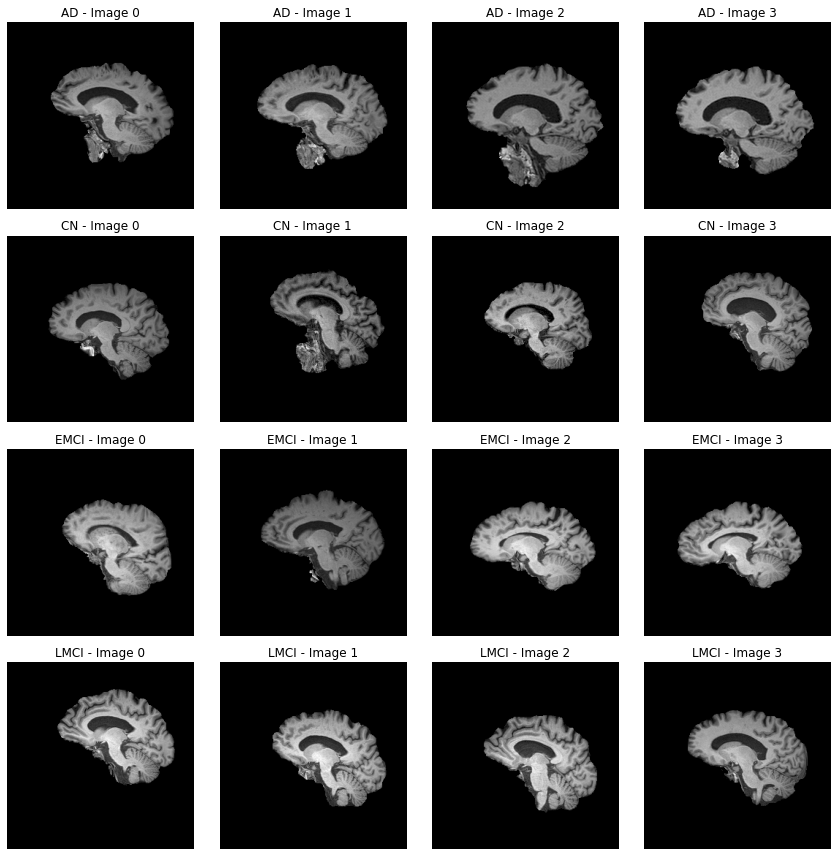

In [4]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, label in enumerate(sagittal_data.keys()):
    for j in range(4):
        if j < len(sagittal_data[label]):
            sagittal_image = sagittal_data[label][j]
            axes[i, j].imshow(sagittal_image[95], cmap='gray')
            axes[i, j].set_title(f'{label} - Image {j}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

### 3.1 Orientasi Axial

mengambil representasi 2D dari orientasi axial dengan melakukan `transpose` (penukaran sumbu), dan sumbu untuk sagittal yaitu `(0, 3, 2, 1)`

In [5]:
axial_data = {}

# Jumlah gambar yang akan diproses dalam satu batch
batch_size = 10
current_batch = {label: [] for label in loaded_data.files}

# Mengekstrak data berdasarkan label kelas dan melakukan transpose ke dalam tampilan axial
for label in loaded_data.files:
    original_data = loaded_data[label]

    # Memproses data dalam batch
    for i in range(0, original_data.shape[0], batch_size):
        batch_images = original_data[i:i + batch_size]
        batch_axial = np.transpose(batch_images, (0, 3, 2, 1))  
        current_batch[label].append(batch_axial)

        # Logging untuk setiap batch yang selesai diproses
        print(f"Processed {i + len(batch_images)}/{original_data.shape[0]} images (Batch {len(current_batch[label])}) for label {label}")

    # Jika batch untuk suatu label sudah mencapai ukuran yang diinginkan, simpan ke dalam dictionary
    if current_batch[label]:
        axial_data[label] = np.vstack(current_batch[label])
        current_batch[label] = []  # Reset batch sementara untuk label tersebut

    print(f"Label: {label}, Shape (axial): {axial_data[label].shape}")

# Memastikan batch terakhir juga disimpan untuk setiap label
for label in current_batch:
    if current_batch[label]:
        axial_data[label] = np.vstack(current_batch[label])

Processed 10/20 images (Batch 1) for label AD
Processed 20/20 images (Batch 2) for label AD
Label: AD, Shape (axial): (20, 256, 256, 170)
Processed 10/20 images (Batch 1) for label CN
Processed 20/20 images (Batch 2) for label CN
Label: CN, Shape (axial): (20, 256, 256, 170)
Processed 10/20 images (Batch 1) for label EMCI
Processed 20/20 images (Batch 2) for label EMCI
Label: EMCI, Shape (axial): (20, 256, 256, 170)
Processed 10/20 images (Batch 1) for label LMCI
Processed 20/20 images (Batch 2) for label LMCI
Label: LMCI, Shape (axial): (20, 256, 256, 170)


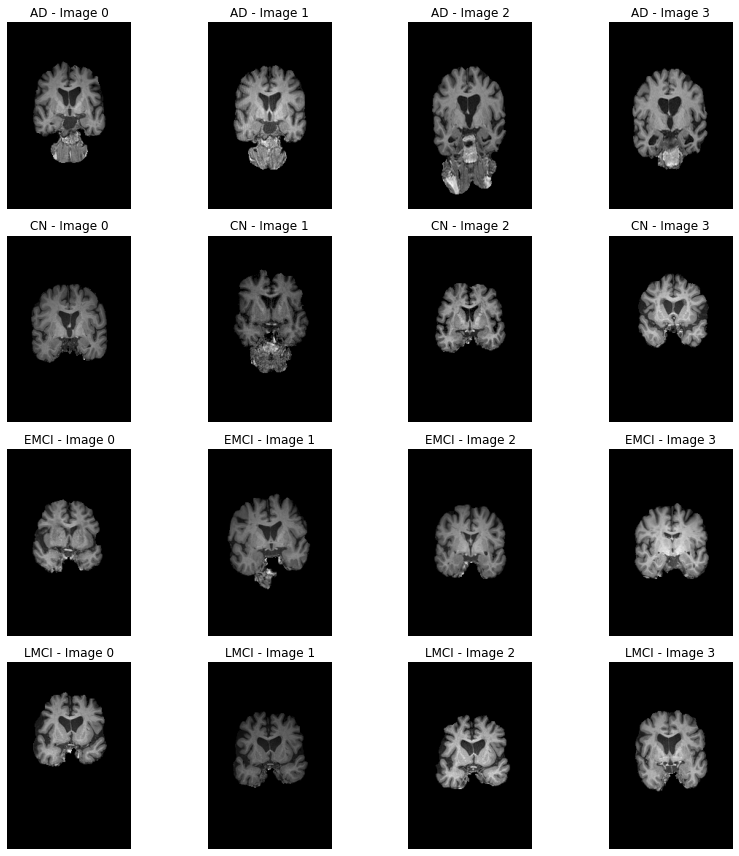

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, label in enumerate(axial_data.keys()):
    for j in range(4):
        if j < len(axial_data[label]):
            axial_image = axial_data[label][j]
            axes[i, j].imshow(axial_image[120], cmap='gray')
            axes[i, j].set_title(f'{label} - Image {j}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

### 3.3 Orientasi Coronal

mengambil representasi 2D dari orientasi coronal dengan melakukan `transpose` (penukaran sumbu), dan sumbu untuk sagittal yaitu `(0, 2, 3, 1)`

In [7]:
coronal_data = {}

# Jumlah gambar yang akan diproses dalam satu batch
batch_size = 10
current_batch = {label: [] for label in loaded_data.files}

# Mengekstrak data berdasarkan label kelas dan melakukan transpose ke dalam tampilan coronal
for label in loaded_data.files:
    original_data = loaded_data[label]

    # Memproses data dalam batch
    for i in range(0, original_data.shape[0], batch_size):
        batch_images = original_data[i:i + batch_size]
        batch_coronal = np.transpose(batch_images, (0, 2, 3, 1))  
        current_batch[label].append(batch_coronal)

        # Logging untuk setiap batch yang selesai diproses
        print(f"Processed {i + len(batch_images)}/{original_data.shape[0]} images (Batch {len(current_batch[label])}) for label {label}")

    # Jika batch untuk suatu label sudah mencapai ukuran yang diinginkan, simpan ke dalam dictionary
    if current_batch[label]:
        coronal_data[label] = np.vstack(current_batch[label])
        current_batch[label] = []  # Reset batch sementara untuk label tersebut

    print(f"Label: {label}, Shape (coronal): {coronal_data[label].shape}")

# Memastikan batch terakhir juga disimpan untuk setiap label
for label in current_batch:
    if current_batch[label]:
        coronal_data[label] = np.vstack(current_batch[label])

Processed 10/20 images (Batch 1) for label AD
Processed 20/20 images (Batch 2) for label AD
Label: AD, Shape (coronal): (20, 256, 256, 170)
Processed 10/20 images (Batch 1) for label CN
Processed 20/20 images (Batch 2) for label CN
Label: CN, Shape (coronal): (20, 256, 256, 170)
Processed 10/20 images (Batch 1) for label EMCI
Processed 20/20 images (Batch 2) for label EMCI
Label: EMCI, Shape (coronal): (20, 256, 256, 170)
Processed 10/20 images (Batch 1) for label LMCI
Processed 20/20 images (Batch 2) for label LMCI
Label: LMCI, Shape (coronal): (20, 256, 256, 170)


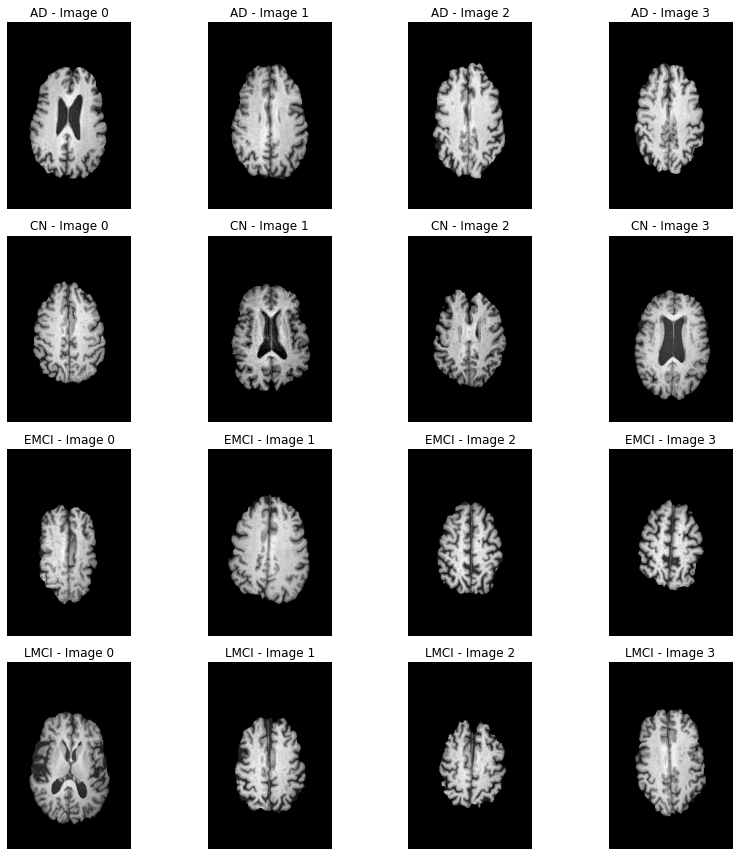

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, label in enumerate(coronal_data.keys()):
    for j in range(4):
        if j < len(coronal_data[label]):
            coronal_image = coronal_data[label][j]
            axes[i, j].imshow(coronal_image[95], cmap='gray')
            axes[i, j].set_title(f'{label} - Image {j}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

## 4. entropy Value Calculation

### 4.1 Menetapkan fungsi untuk menghitung nilai entropy

In [9]:
def calculate_entropy_from_slice(slice):
    min_pixel = np.min(slice)
    max_pixel = np.max(slice)
    
    if min_pixel == max_pixel:
        min_pixel = 0
        max_pixel = 1

    normalized_slice = (slice - min_pixel) / (max_pixel - min_pixel)
    
    try:
        entropy_value = entropy(normalized_slice.ravel(), base=2)
    except RuntimeWarning:
        entropy_value = 0.0 
    
    return entropy_value

### 4.2 Nilai Entropy dari Orientasi Sagittal
menghitung nilai entropy dari setiap slice dalam data gambar sagittal, kemudian memilih 3 slice dengan nilai entropy tertinggi untuk setiap volume dalam setiap label. Hasilnya disimpan dalam `selected_sagittal_slice` dan dicetak bersama dengan total slice yang dipilih.

In [10]:
selected_sagittal_slice = {}

total_selected_sagittal_slice = 0

for label, data in sagittal_data.items():
    print(f"Label: {label}")
    
    top_slices = []
    
    for volume_index, volume in enumerate(data):
        slice_entropies = []
        
        for slice_index, slice in enumerate(volume):
            entropy_value = calculate_entropy_from_slice(slice)
            slice_entropies.append((slice_index, slice, entropy_value))
        
        sorted_slices = sorted(slice_entropies, key=lambda x: x[2], reverse=True)
        
        selected_sagittal_slice_for_volume = []
        for i, (index, selected_slice, entropy_value) in enumerate(sorted_slices):
            if not np.isnan(entropy_value):
                selected_sagittal_slice_for_volume.append((index, selected_slice))
            
            if len(selected_sagittal_slice_for_volume) == 3:
                break
        
        top_slices.extend(selected_sagittal_slice_for_volume)
    
    selected_sagittal_slice[label] = top_slices
    
    for i, (position, top_slice) in enumerate(top_slices):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")
    
    total_selected_sagittal_slice += len(top_slices)    

print(f"Total Slice yang Dipilih: {total_selected_sagittal_slice}")

Label: AD


c:\Users\fauziah reza o\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


Top Slice 1 - Position: 76, Entropy: 13.8140
Top Slice 2 - Position: 77, Entropy: 13.8129
Top Slice 3 - Position: 75, Entropy: 13.8128
Top Slice 4 - Position: 77, Entropy: 13.8992
Top Slice 5 - Position: 75, Entropy: 13.8979
Top Slice 6 - Position: 78, Entropy: 13.8968
Top Slice 7 - Position: 71, Entropy: 14.2522
Top Slice 8 - Position: 72, Entropy: 14.2517
Top Slice 9 - Position: 67, Entropy: 14.2515
Top Slice 10 - Position: 74, Entropy: 14.0613
Top Slice 11 - Position: 73, Entropy: 14.0610
Top Slice 12 - Position: 72, Entropy: 14.0582
Top Slice 13 - Position: 72, Entropy: 14.2257
Top Slice 14 - Position: 71, Entropy: 14.2238
Top Slice 15 - Position: 73, Entropy: 14.2213
Top Slice 16 - Position: 83, Entropy: 13.9124
Top Slice 17 - Position: 76, Entropy: 13.9058
Top Slice 18 - Position: 82, Entropy: 13.9056
Top Slice 19 - Position: 100, Entropy: 13.6324
Top Slice 20 - Position: 101, Entropy: 13.6310
Top Slice 21 - Position: 74, Entropy: 13.6228
Top Slice 22 - Position: 95, Entropy: 13.

In [11]:
for label, top_slices in selected_sagittal_slice.items():
    print(f"Label: {label}")
    
    for i, (position, top_slice) in enumerate(top_slices[:3]):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")

Label: AD
Top Slice 1 - Position: 76, Entropy: 13.8140
Top Slice 2 - Position: 77, Entropy: 13.8129
Top Slice 3 - Position: 75, Entropy: 13.8128
Label: CN
Top Slice 1 - Position: 75, Entropy: 13.7009
Top Slice 2 - Position: 76, Entropy: 13.6994
Top Slice 3 - Position: 77, Entropy: 13.6981
Label: EMCI
Top Slice 1 - Position: 73, Entropy: 13.6603
Top Slice 2 - Position: 72, Entropy: 13.6586
Top Slice 3 - Position: 71, Entropy: 13.6554
Label: LMCI
Top Slice 1 - Position: 74, Entropy: 13.6294
Top Slice 2 - Position: 73, Entropy: 13.6268
Top Slice 3 - Position: 75, Entropy: 13.6259


Cek data yang sudah diseleksi

In [12]:
for label, data in selected_sagittal_slice.items():
    total_data = len(data)
    print(f"Label: {label}, Total Data: {total_data}")

Label: AD, Total Data: 60
Label: CN, Total Data: 60
Label: EMCI, Total Data: 60
Label: LMCI, Total Data: 60


In [13]:
for label, data in selected_sagittal_slice.items():
    for volume_index, (position, slice) in enumerate(data):
        volume_shape = slice.shape
        print(f"Label: {label}, Volume {volume_index + 1}, Slice_Position: {position}, Shape: {volume_shape}")

Label: AD, Volume 1, Slice_Position: 76, Shape: (256, 256)
Label: AD, Volume 2, Slice_Position: 77, Shape: (256, 256)
Label: AD, Volume 3, Slice_Position: 75, Shape: (256, 256)
Label: AD, Volume 4, Slice_Position: 77, Shape: (256, 256)
Label: AD, Volume 5, Slice_Position: 75, Shape: (256, 256)
Label: AD, Volume 6, Slice_Position: 78, Shape: (256, 256)
Label: AD, Volume 7, Slice_Position: 71, Shape: (256, 256)
Label: AD, Volume 8, Slice_Position: 72, Shape: (256, 256)
Label: AD, Volume 9, Slice_Position: 67, Shape: (256, 256)
Label: AD, Volume 10, Slice_Position: 74, Shape: (256, 256)
Label: AD, Volume 11, Slice_Position: 73, Shape: (256, 256)
Label: AD, Volume 12, Slice_Position: 72, Shape: (256, 256)
Label: AD, Volume 13, Slice_Position: 72, Shape: (256, 256)
Label: AD, Volume 14, Slice_Position: 71, Shape: (256, 256)
Label: AD, Volume 15, Slice_Position: 73, Shape: (256, 256)
Label: AD, Volume 16, Slice_Position: 83, Shape: (256, 256)
Label: AD, Volume 17, Slice_Position: 76, Shape: 

Resize Citra

In [14]:
# Fungsi untuk meresize slice menjadi ukuran yang dapat disesuaikan
def resize_slice(slice_data, target_size=(224, 224)):
    return cv2.resize(slice_data, dsize=target_size)

# Mengekstrak data dari selected_sagittal_slice
selected_sagittal_slice_resized = {}  # Dictionary untuk menyimpan hasil resize

for label, slices in selected_sagittal_slice.items():
    resized_slices = [(position, resize_slice(slice_data)) for position, slice_data in slices]
    selected_sagittal_slice_resized[label] = resized_slices

# Cetak bentuk output untuk setiap label
for label, result_slices in selected_sagittal_slice_resized.items():
    print(f"Label: {label}, Jumlah Slice Terpilih: {len(result_slices)}")

# Jika Anda ingin menampilkan bentuk dari setiap slice terpilih
for label, result_slices in selected_sagittal_slice_resized.items():
    for i, (position, resized_slice) in enumerate(result_slices):
        print(f"Label: {label}, Resized Slice {i+1} - Position: {position}, Shape: {resized_slice.shape}")

Label: AD, Jumlah Slice Terpilih: 60
Label: CN, Jumlah Slice Terpilih: 60
Label: EMCI, Jumlah Slice Terpilih: 60
Label: LMCI, Jumlah Slice Terpilih: 60
Label: AD, Resized Slice 1 - Position: 76, Shape: (224, 224)
Label: AD, Resized Slice 2 - Position: 77, Shape: (224, 224)
Label: AD, Resized Slice 3 - Position: 75, Shape: (224, 224)
Label: AD, Resized Slice 4 - Position: 77, Shape: (224, 224)
Label: AD, Resized Slice 5 - Position: 75, Shape: (224, 224)
Label: AD, Resized Slice 6 - Position: 78, Shape: (224, 224)
Label: AD, Resized Slice 7 - Position: 71, Shape: (224, 224)
Label: AD, Resized Slice 8 - Position: 72, Shape: (224, 224)
Label: AD, Resized Slice 9 - Position: 67, Shape: (224, 224)
Label: AD, Resized Slice 10 - Position: 74, Shape: (224, 224)
Label: AD, Resized Slice 11 - Position: 73, Shape: (224, 224)
Label: AD, Resized Slice 12 - Position: 72, Shape: (224, 224)
Label: AD, Resized Slice 13 - Position: 72, Shape: (224, 224)
Label: AD, Resized Slice 14 - Position: 71, Shape: 

Cek hasil resize

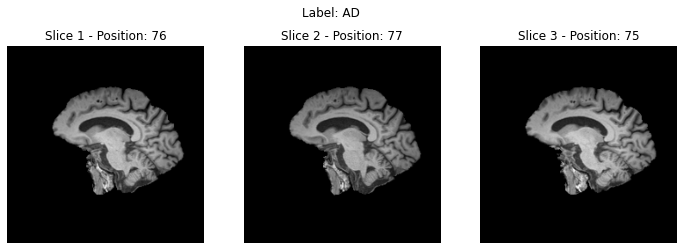

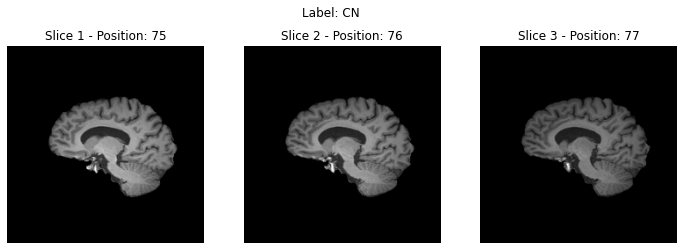

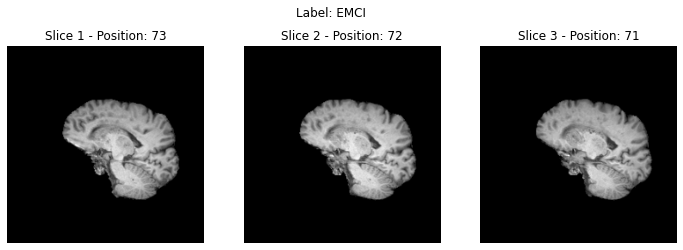

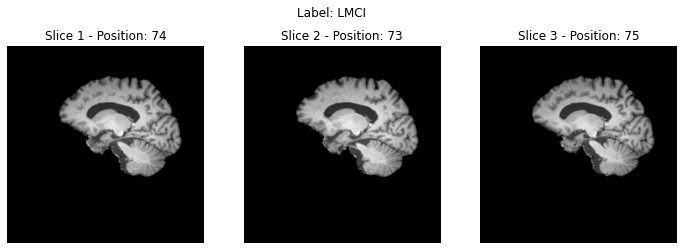

In [15]:
for label, result_slices in selected_sagittal_slice_resized.items():
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f"Label: {label}")
    
    for i, (position, resized_slice) in enumerate(result_slices[:3]):
        axes[i].imshow(resized_slice, cmap='gray')
        axes[i].set_title(f"Slice {i+1} - Position: {position}")
        axes[i].axis('off')

    plt.show()

### 4.3 Nilai Entropy dari Orientasi Axial
menghitung nilai entropy dari setiap slice dalam data gambar axial, kemudian memilih 3 slice dengan nilai entropy tertinggi untuk setiap volume dalam setiap label. Hasilnya disimpan dalam `selected_axial_slice` dan dicetak bersama dengan total slice yang dipilih.

In [16]:
selected_axial_slice = {}

total_selected_axial_slice = 0

for label, data in axial_data.items():
    print(f"Label: {label}")
    
    top_slices = []
    
    for volume_index, volume in enumerate(data):
        slice_entropies = []
        
        for slice_index, slice in enumerate(volume):
            entropy_value = calculate_entropy_from_slice(slice)
            slice_entropies.append((slice_index, slice, entropy_value))
        
        sorted_slices = sorted(slice_entropies, key=lambda x: x[2], reverse=True)
        
        selected_axial_slice_for_volume = []
        for i, (index, selected_slice, entropy_value) in enumerate(sorted_slices):
            if not np.isnan(entropy_value):
                selected_axial_slice_for_volume.append((index, selected_slice))
            
            if len(selected_axial_slice_for_volume) == 3:
                break
        
        top_slices.extend(selected_axial_slice_for_volume)
    
    selected_axial_slice[label] = top_slices
    
    for i, (position, top_slice) in enumerate(top_slices):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")
    
    total_selected_axial_slice += len(top_slices)    

print(f"Total Slice yang Dipilih: {total_selected_axial_slice}")

Label: AD
Top Slice 1 - Position: 158, Entropy: 13.3634
Top Slice 2 - Position: 157, Entropy: 13.3627
Top Slice 3 - Position: 159, Entropy: 13.3618
Top Slice 4 - Position: 157, Entropy: 13.3875
Top Slice 5 - Position: 156, Entropy: 13.3846
Top Slice 6 - Position: 158, Entropy: 13.3844
Top Slice 7 - Position: 125, Entropy: 13.5952
Top Slice 8 - Position: 126, Entropy: 13.5944
Top Slice 9 - Position: 127, Entropy: 13.5934
Top Slice 10 - Position: 153, Entropy: 13.4574
Top Slice 11 - Position: 154, Entropy: 13.4560
Top Slice 12 - Position: 155, Entropy: 13.4535
Top Slice 13 - Position: 123, Entropy: 13.4870
Top Slice 14 - Position: 124, Entropy: 13.4865
Top Slice 15 - Position: 126, Entropy: 13.4864
Top Slice 16 - Position: 164, Entropy: 13.3429
Top Slice 17 - Position: 163, Entropy: 13.3418
Top Slice 18 - Position: 162, Entropy: 13.3416
Top Slice 19 - Position: 134, Entropy: 13.2904
Top Slice 20 - Position: 133, Entropy: 13.2861
Top Slice 21 - Position: 135, Entropy: 13.2822
Top Slice 22

In [17]:
for label, top_slices in selected_axial_slice.items():
    print(f"Label: {label}")
    
    for i, (position, top_slice) in enumerate(top_slices[:3]):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")

Label: AD
Top Slice 1 - Position: 158, Entropy: 13.3634
Top Slice 2 - Position: 157, Entropy: 13.3627
Top Slice 3 - Position: 159, Entropy: 13.3618
Label: CN
Top Slice 1 - Position: 163, Entropy: 13.3160
Top Slice 2 - Position: 164, Entropy: 13.3151
Top Slice 3 - Position: 162, Entropy: 13.3139
Label: EMCI
Top Slice 1 - Position: 158, Entropy: 13.3123
Top Slice 2 - Position: 157, Entropy: 13.3110
Top Slice 3 - Position: 156, Entropy: 13.3104
Label: LMCI
Top Slice 1 - Position: 165, Entropy: 13.3565
Top Slice 2 - Position: 166, Entropy: 13.3560
Top Slice 3 - Position: 164, Entropy: 13.3513


Cek data yang sudah diseleksi

In [18]:
for label, data in selected_axial_slice.items():
    total_data = len(data)
    print(f"Label: {label}, Total Data: {total_data}")

Label: AD, Total Data: 60
Label: CN, Total Data: 60
Label: EMCI, Total Data: 60
Label: LMCI, Total Data: 60


In [19]:
for label, data in selected_axial_slice.items():
    for volume_index, (position, slice) in enumerate(data):
        volume_shape = slice.shape
        print(f"Label: {label}, Volume {volume_index + 1}, Slice_Position: {position}, Shape: {volume_shape}")

Label: AD, Volume 1, Slice_Position: 158, Shape: (256, 170)
Label: AD, Volume 2, Slice_Position: 157, Shape: (256, 170)
Label: AD, Volume 3, Slice_Position: 159, Shape: (256, 170)
Label: AD, Volume 4, Slice_Position: 157, Shape: (256, 170)
Label: AD, Volume 5, Slice_Position: 156, Shape: (256, 170)
Label: AD, Volume 6, Slice_Position: 158, Shape: (256, 170)
Label: AD, Volume 7, Slice_Position: 125, Shape: (256, 170)
Label: AD, Volume 8, Slice_Position: 126, Shape: (256, 170)
Label: AD, Volume 9, Slice_Position: 127, Shape: (256, 170)
Label: AD, Volume 10, Slice_Position: 153, Shape: (256, 170)
Label: AD, Volume 11, Slice_Position: 154, Shape: (256, 170)
Label: AD, Volume 12, Slice_Position: 155, Shape: (256, 170)
Label: AD, Volume 13, Slice_Position: 123, Shape: (256, 170)
Label: AD, Volume 14, Slice_Position: 124, Shape: (256, 170)
Label: AD, Volume 15, Slice_Position: 126, Shape: (256, 170)
Label: AD, Volume 16, Slice_Position: 164, Shape: (256, 170)
Label: AD, Volume 17, Slice_Posit

resize citra

In [20]:
# Fungsi untuk meresize slice menjadi ukuran yang dapat disesuaikan
def resize_slice(slice_data, target_size=(224, 224)):
    return cv2.resize(slice_data, dsize=target_size)

# Mengekstrak data dari selected_axial_slice
selected_axial_slice_resized = {}  # Dictionary untuk menyimpan hasil resize

for label, slices in selected_axial_slice.items():
    resized_slices = [(position, resize_slice(slice_data)) for position, slice_data in slices]
    selected_axial_slice_resized[label] = resized_slices

# Cetak bentuk output untuk setiap label
for label, result_slices in selected_axial_slice_resized.items():
    print(f"Label: {label}, Jumlah Slice Terpilih: {len(result_slices)}")

# Jika Anda ingin menampilkan bentuk dari setiap slice terpilih
for label, result_slices in selected_axial_slice_resized.items():
    for i, (position, resized_slice) in enumerate(result_slices):
        print(f"Label: {label}, Resized Slice {i+1} - Position: {position}, Shape: {resized_slice.shape}")

Label: AD, Jumlah Slice Terpilih: 60
Label: CN, Jumlah Slice Terpilih: 60
Label: EMCI, Jumlah Slice Terpilih: 60
Label: LMCI, Jumlah Slice Terpilih: 60
Label: AD, Resized Slice 1 - Position: 158, Shape: (224, 224)
Label: AD, Resized Slice 2 - Position: 157, Shape: (224, 224)
Label: AD, Resized Slice 3 - Position: 159, Shape: (224, 224)
Label: AD, Resized Slice 4 - Position: 157, Shape: (224, 224)
Label: AD, Resized Slice 5 - Position: 156, Shape: (224, 224)
Label: AD, Resized Slice 6 - Position: 158, Shape: (224, 224)
Label: AD, Resized Slice 7 - Position: 125, Shape: (224, 224)
Label: AD, Resized Slice 8 - Position: 126, Shape: (224, 224)
Label: AD, Resized Slice 9 - Position: 127, Shape: (224, 224)
Label: AD, Resized Slice 10 - Position: 153, Shape: (224, 224)
Label: AD, Resized Slice 11 - Position: 154, Shape: (224, 224)
Label: AD, Resized Slice 12 - Position: 155, Shape: (224, 224)
Label: AD, Resized Slice 13 - Position: 123, Shape: (224, 224)
Label: AD, Resized Slice 14 - Position

cek hasil resize

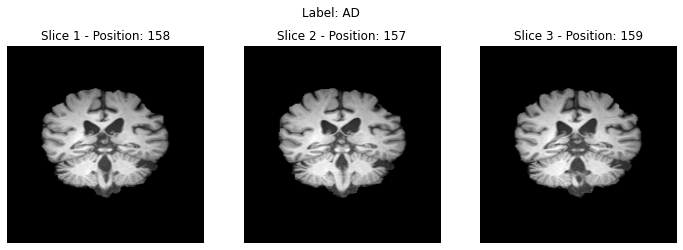

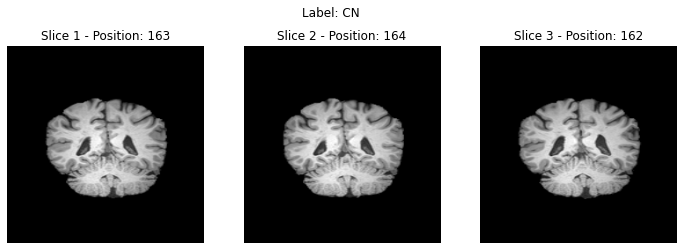

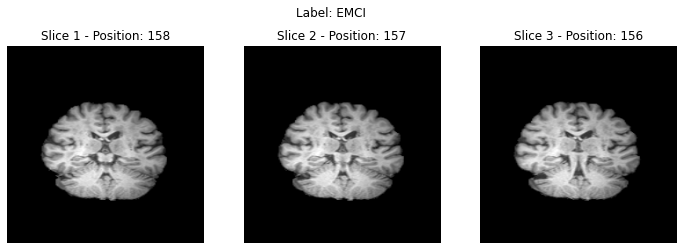

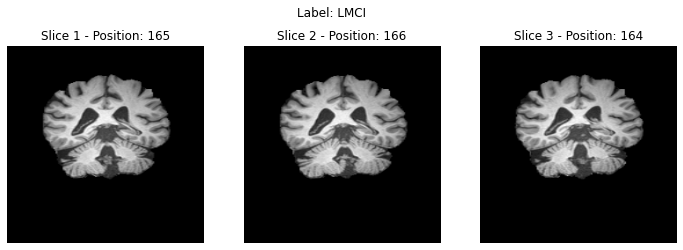

In [21]:
for label, result_slices in selected_axial_slice_resized.items():
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f"Label: {label}")
    
    for i, (position, resized_slice) in enumerate(result_slices[:3]):
        axes[i].imshow(resized_slice, cmap='gray')
        axes[i].set_title(f"Slice {i+1} - Position: {position}")
        axes[i].axis('off')

    plt.show()

### 4.4 Nilai Entropy dari Orientasi Coronal
menghitung nilai entropy dari setiap slice dalam data gambar coronal, kemudian memilih 3 slice dengan nilai entropy tertinggi untuk setiap volume dalam setiap label. Hasilnya disimpan dalam `selected_coronal_slice` dan dicetak bersama dengan total slice yang dipilih.

In [22]:
selected_coronal_slice = {}

total_selected_coronal_slice = 0

for label, data in coronal_data.items():
    print(f"Label: {label}")
    
    top_slices = []
    
    for volume_index, volume in enumerate(data):
        slice_entropies = []
        
        for slice_index, slice in enumerate(volume):
            entropy_value = calculate_entropy_from_slice(slice)
            slice_entropies.append((slice_index, slice, entropy_value))
        
        sorted_slices = sorted(slice_entropies, key=lambda x: x[2], reverse=True)
        
        selected_coronal_slice_for_volume = []
        for i, (index, selected_slice, entropy_value) in enumerate(sorted_slices):
            if not np.isnan(entropy_value):
                selected_coronal_slice_for_volume.append((index, selected_slice))
            
            if len(selected_coronal_slice_for_volume) == 3:
                break
        
        top_slices.extend(selected_coronal_slice_for_volume)
    
    selected_coronal_slice[label] = top_slices
    
    for i, (position, top_slice) in enumerate(top_slices):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")
    
    total_selected_coronal_slice += len(top_slices)    

print(f"Total Slice yang Dipilih: {total_selected_coronal_slice}")

Label: AD
Top Slice 1 - Position: 107, Entropy: 13.6326
Top Slice 2 - Position: 111, Entropy: 13.6324
Top Slice 3 - Position: 110, Entropy: 13.6307
Top Slice 4 - Position: 122, Entropy: 13.7540
Top Slice 5 - Position: 121, Entropy: 13.7528
Top Slice 6 - Position: 123, Entropy: 13.7520
Top Slice 7 - Position: 132, Entropy: 13.8115
Top Slice 8 - Position: 131, Entropy: 13.8078
Top Slice 9 - Position: 133, Entropy: 13.8074
Top Slice 10 - Position: 136, Entropy: 13.8154
Top Slice 11 - Position: 135, Entropy: 13.8125
Top Slice 12 - Position: 137, Entropy: 13.8105
Top Slice 13 - Position: 136, Entropy: 13.8177
Top Slice 14 - Position: 137, Entropy: 13.8173
Top Slice 15 - Position: 135, Entropy: 13.8115
Top Slice 16 - Position: 133, Entropy: 13.7844
Top Slice 17 - Position: 132, Entropy: 13.7842
Top Slice 18 - Position: 131, Entropy: 13.7797
Top Slice 19 - Position: 121, Entropy: 13.4268
Top Slice 20 - Position: 120, Entropy: 13.4253
Top Slice 21 - Position: 124, Entropy: 13.4245
Top Slice 22

In [23]:
for label, top_slices in selected_coronal_slice.items():
    print(f"Label: {label}")
    
    for i, (position, top_slice) in enumerate(top_slices[:3]):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")

Label: AD
Top Slice 1 - Position: 107, Entropy: 13.6326
Top Slice 2 - Position: 111, Entropy: 13.6324
Top Slice 3 - Position: 110, Entropy: 13.6307
Label: CN
Top Slice 1 - Position: 128, Entropy: 13.6823
Top Slice 2 - Position: 129, Entropy: 13.6808
Top Slice 3 - Position: 127, Entropy: 13.6794
Label: EMCI
Top Slice 1 - Position: 117, Entropy: 13.4119
Top Slice 2 - Position: 118, Entropy: 13.4111
Top Slice 3 - Position: 116, Entropy: 13.4083
Label: LMCI
Top Slice 1 - Position: 99, Entropy: 13.5463
Top Slice 2 - Position: 98, Entropy: 13.5411
Top Slice 3 - Position: 100, Entropy: 13.5384


Cek data yang sudah diseleksi

In [24]:
for label, data in selected_coronal_slice.items():
    total_data = len(data)
    print(f"Label: {label}, Total Data: {total_data}")

Label: AD, Total Data: 60
Label: CN, Total Data: 60
Label: EMCI, Total Data: 60
Label: LMCI, Total Data: 60


In [25]:
for label, data in selected_coronal_slice.items():
    for volume_index, (position, slice) in enumerate(data):
        volume_shape = slice.shape
        print(f"Label: {label}, Volume {volume_index + 1}, Slice_Position: {position}, Shape: {volume_shape}")

Label: AD, Volume 1, Slice_Position: 107, Shape: (256, 170)
Label: AD, Volume 2, Slice_Position: 111, Shape: (256, 170)
Label: AD, Volume 3, Slice_Position: 110, Shape: (256, 170)
Label: AD, Volume 4, Slice_Position: 122, Shape: (256, 170)
Label: AD, Volume 5, Slice_Position: 121, Shape: (256, 170)
Label: AD, Volume 6, Slice_Position: 123, Shape: (256, 170)
Label: AD, Volume 7, Slice_Position: 132, Shape: (256, 170)
Label: AD, Volume 8, Slice_Position: 131, Shape: (256, 170)
Label: AD, Volume 9, Slice_Position: 133, Shape: (256, 170)
Label: AD, Volume 10, Slice_Position: 136, Shape: (256, 170)
Label: AD, Volume 11, Slice_Position: 135, Shape: (256, 170)
Label: AD, Volume 12, Slice_Position: 137, Shape: (256, 170)
Label: AD, Volume 13, Slice_Position: 136, Shape: (256, 170)
Label: AD, Volume 14, Slice_Position: 137, Shape: (256, 170)
Label: AD, Volume 15, Slice_Position: 135, Shape: (256, 170)
Label: AD, Volume 16, Slice_Position: 133, Shape: (256, 170)
Label: AD, Volume 17, Slice_Posit

resize citra

In [26]:
# Fungsi untuk meresize slice menjadi ukuran yang dapat disesuaikan
def resize_slice(slice_data, target_size=(224, 224)):
    return cv2.resize(slice_data, dsize=target_size)

# Mengekstrak data dari selected_coronal_slice
selected_coronal_slice_resized = {}  # Dictionary untuk menyimpan hasil resize

for label, slices in selected_coronal_slice.items():
    resized_slices = [(position, resize_slice(slice_data)) for position, slice_data in slices]
    selected_coronal_slice_resized[label] = resized_slices

# Cetak bentuk output untuk setiap label
for label, result_slices in selected_coronal_slice_resized.items():
    print(f"Label: {label}, Jumlah Slice Terpilih: {len(result_slices)}")

# Jika Anda ingin menampilkan bentuk dari setiap slice terpilih
for label, result_slices in selected_coronal_slice_resized.items():
    for i, (position, resized_slice) in enumerate(result_slices):
        print(f"Label: {label}, Resized Slice {i+1} - Position: {position}, Shape: {resized_slice.shape}")

Label: AD, Jumlah Slice Terpilih: 60
Label: CN, Jumlah Slice Terpilih: 60
Label: EMCI, Jumlah Slice Terpilih: 60
Label: LMCI, Jumlah Slice Terpilih: 60
Label: AD, Resized Slice 1 - Position: 107, Shape: (224, 224)
Label: AD, Resized Slice 2 - Position: 111, Shape: (224, 224)
Label: AD, Resized Slice 3 - Position: 110, Shape: (224, 224)
Label: AD, Resized Slice 4 - Position: 122, Shape: (224, 224)
Label: AD, Resized Slice 5 - Position: 121, Shape: (224, 224)
Label: AD, Resized Slice 6 - Position: 123, Shape: (224, 224)
Label: AD, Resized Slice 7 - Position: 132, Shape: (224, 224)
Label: AD, Resized Slice 8 - Position: 131, Shape: (224, 224)
Label: AD, Resized Slice 9 - Position: 133, Shape: (224, 224)
Label: AD, Resized Slice 10 - Position: 136, Shape: (224, 224)
Label: AD, Resized Slice 11 - Position: 135, Shape: (224, 224)
Label: AD, Resized Slice 12 - Position: 137, Shape: (224, 224)
Label: AD, Resized Slice 13 - Position: 136, Shape: (224, 224)
Label: AD, Resized Slice 14 - Position

cek hasil

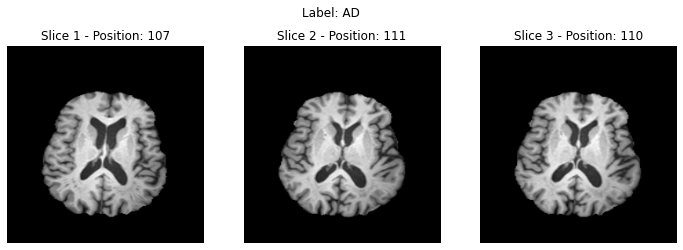

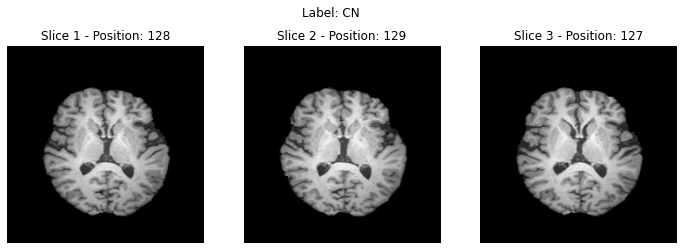

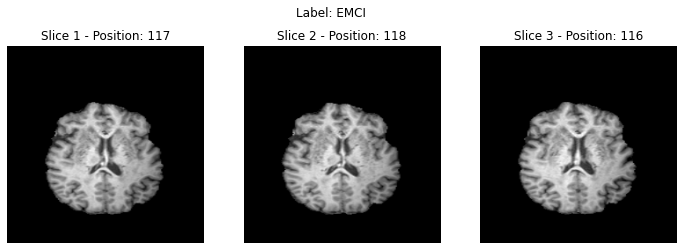

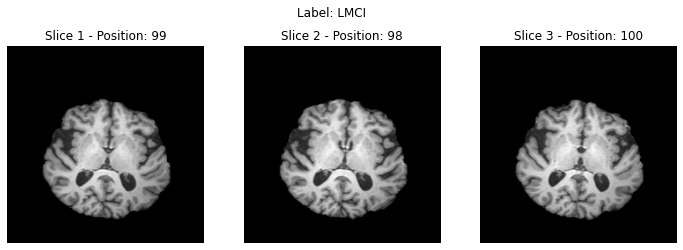

In [27]:
for label, result_slices in selected_coronal_slice_resized.items():
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f"Label: {label}")
    
    for i, (position, resized_slice) in enumerate(result_slices[:3]):
        axes[i].imshow(resized_slice, cmap='gray')
        axes[i].set_title(f"Slice {i+1} - Position: {position}")
        axes[i].axis('off')

    plt.show()

## 5. Resize Citra

In [28]:
combined_slices = {}

for plane, slices_dict in {'coronal': selected_coronal_slice_resized, 'axial': selected_axial_slice_resized, 'sagittal': selected_sagittal_slice_resized}.items():
    for label, result_slices in slices_dict.items():
        combined_slices.setdefault(label, {})[plane] = result_slices

In [29]:
for label, plane_slices in combined_slices.items():
    total_slices = sum(len(slices) for slices in plane_slices.values())
    print(f"Label: {label}, Jumlah Total Slice: {total_slices}")

Label: AD, Jumlah Total Slice: 180
Label: CN, Jumlah Total Slice: 180
Label: EMCI, Jumlah Total Slice: 180
Label: LMCI, Jumlah Total Slice: 180


## 6. Simpan Data

In [30]:
np.savez("selected_image.npz", combined_slices=combined_slices)
print(f"Data disimpan dengan sukses ke selected_image.npz")

Data disimpan dengan sukses ke selected_image.npz
